In [1]:
!pip install kaggle

In [3]:
import zipfile
import os
import pandas as pd
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

In [4]:
# É mais fácil carregar seu kaggle.json do que carregar meu dataset.

json_path = '/content/kaggle.json' # @param {type:"string"}

kaggle_api_path = os.path.expanduser(json_path)

In [5]:
os.chmod(kaggle_api_path, 600)

# Dataset de séries climáticas em Delhi, India.
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

with zipfile.ZipFile('daily-climate-time-series-data.zip', 'r') as zip_ref:
    zip_ref.extractall('daily_climate_data')

train_path = os.path.join('daily_climate_data', 'DailyDelhiClimateTrain.csv')
test_path = os.path.join('daily_climate_data', 'DailyDelhiClimateTest.csv')

Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 49.8MB/s]


In [6]:
train_dataset = pd.read_csv(train_path)

display(train_dataset)

print('\nColuna "date": Data quando os dados foram extraídos no formato YYYY-MM-DD')
print('\nColuna "meantemp": Valor de temperatura média calculada em vários intervalos de 3 horas durante o dia')
print('\nColuna "humidity": Valor de umidade do dia (gramas de vapor de água por metro cúbico de volume de ar)')
print('\nColuna "wind_speed": Velocidade do vento medida em km/h')
print('\nColuna "meanpressure": Leitura de pressão do clima (medida em atm)')
print('\nEscolha de predição: Coluna "meantemp", pois é útil para informar os cidadãos a previsão de temperatura média do dia, e economiza o processo de calcular a temperatura várias vezes no dia')

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000



Coluna "date": Data quando os dados foram extraídos no formato YYYY-MM-DD

Coluna "meantemp": Valor de temperatura média calculada em vários intervalos de 3 horas durante o dia

Coluna "humidity": Valor de umidade do dia (gramas de vapor de água por metro cúbico de volume de ar)

Coluna "wind_speed": Velocidade do vento medida em km/h

Coluna "meanpressure": Leitura de pressão do clima (medida em atm)

Escolha de predição: Coluna "meantemp", pois é útil para informar os cidadãos a previsão de temperatura média do dia, e economiza o processo de calcular a temperatura várias vezes no dia


In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

train_data = pd.read_csv('daily_climate_data/DailyDelhiClimateTrain.csv')
test_data = pd.read_csv('daily_climate_data/DailyDelhiClimateTest.csv')

features = ['humidity', 'wind_speed', 'meanpressure']
target = 'meantemp'

X_train = train_data[features].values
y_train = train_data[target].values

X_test = test_data[features].values
y_test = test_data[target].values

In [34]:
# Normalizar para conseguir predizer melhor

scaler_X = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_Y = MinMaxScaler()


y_train_scaled = scaler_Y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_Y.transform(y_test.reshape(-1, 1))

In [35]:
# Criando RNN Simples
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['accuracy']) # Métrica selecionada = accuracy

history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled))

y_pred = model.predict(X_test_scaled)

y_pred_inverse = scaler_Y.inverse_transform(y_pred)
y_test_inverse = scaler_Y.inverse_transform(y_test_scaled)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 3.1720e-04 - loss: 1.2000 - val_accuracy: 0.0000e+00 - val_loss: 0.7898
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.7616 - val_accuracy: 0.0000e+00 - val_loss: 0.7863
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.7256 - val_accuracy: 0.0000e+00 - val_loss: 0.7622
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.4017e-04 - loss: 0.6980 - val_accuracy: 0.0000e+00 - val_loss: 0.7321
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0011 - loss: 0.6775 - val_accuracy: 0.0000e+00 - val_loss: 0.7169
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.4017e-04 - loss: 0.6689 - val_accuracy: 0.0000e+00 - val_loss: 0.7027
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 6.0855e-04 - loss: 0.6654 - val_accuracy: 0.0000e+00 - val_loss: 0.7183
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 8.5

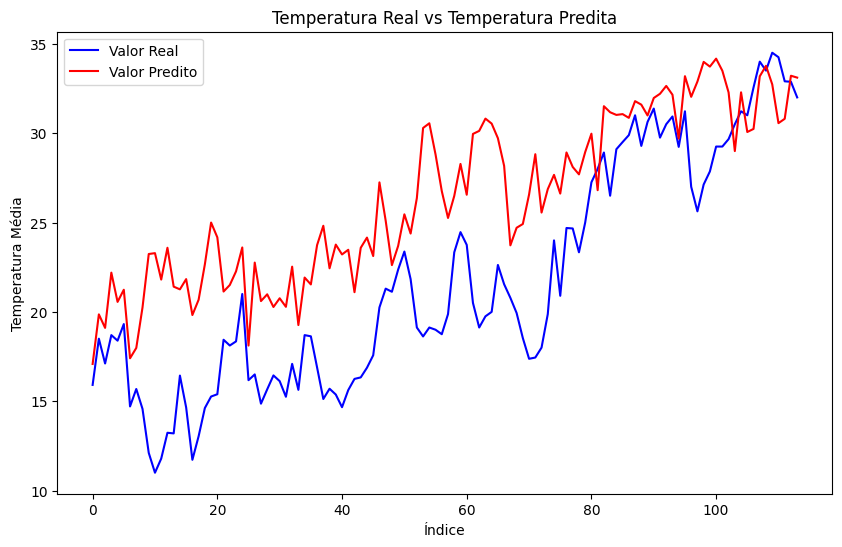

In [37]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(y_test_inverse)), y=y_test_inverse.flatten(), label='Valor Real', color='blue')
sns.lineplot(x=range(len(y_pred_inverse)), y=y_pred_inverse.flatten(), label='Valor Predito', color='red')
plt.title('Temperatura Real vs Temperatura Predita')
plt.xlabel('Índice')
plt.ylabel('Temperatura Média')
plt.legend()
plt.show()
